In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.utils import shuffle, resample
from scipy.stats import chi2
from scipy.stats import norm
from scipy.stats import t
from tqdm import tqdm

In [3]:
sample = np.array([0.974,0.950,0.932,1.104,1.038,0.920,0.935,0.907,0.810,0.915])
n = len(sample)
sigma = np.sqrt(0.15)

In [4]:
media = np.mean(sample)
print(media)

0.9484999999999999


In [30]:
lower = norm.ppf( 0.025 )
upper = norm.ppf( 0.975 )
print(lower,upper)

-1.9599639845400545 1.959963984540054


In [32]:
x_ = np.linspace( norm.ppf( 0.0001 ), norm.ppf( 0.9999 ), 100  )

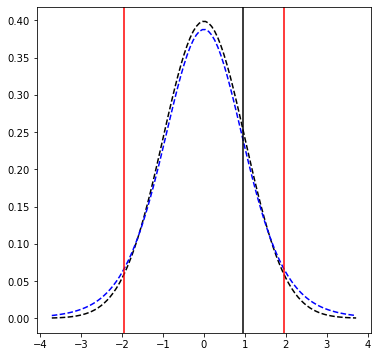

In [33]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.plot(x_, norm.pdf(x_),'k--')
ax.plot(x_, t.pdf(x_,df=n-1),'b--')
ax.axvline( x = lower, color='r')
ax.axvline( x = upper, color='r')
ax.axvline( x = media, color='k' )

In [16]:
IC = [ media + lower*sigma/np.sqrt(n), media + upper*sigma/np.sqrt(n)  ]
print(IC)

CL = norm.cdf( media )
pvalue = 1 - CL

print(pvalue)

[0.7084544161822344, 1.1885455838177654]
0.17143748640476186


In [19]:
def Bootstrapping(sample):
    resample_ = np.random.choice( sample, size = len(sample), replace = True ) # Debe ser con reemplazo
    return np.mean( resample_ )

In [20]:
Mean_ = []
Ntrials = 100000

for i in range(Ntrials):
    Mean_.append(Bootstrapping(sample))

In [21]:
# Construirmos el histograma 
min_, max_ = np.min(Mean_), np.max(Mean_)
h = 0.01
bins = np.arange(min_, max_+h, h)
print(min_,max_)

0.8569000000000001 1.0719


In [22]:
H1, bines = np.histogram(Mean_, bins=bins)
w = np.diff(bines)
# Marca de clase
m = bines[:-1] + 0.5*w[0]
H1Norm = H1 / np.sum(H1*w) 

In [25]:
cuantiles = np.quantile(a = Mean_, q=[0.025,0.975])
print(cuantiles)

[0.9034 0.9967]


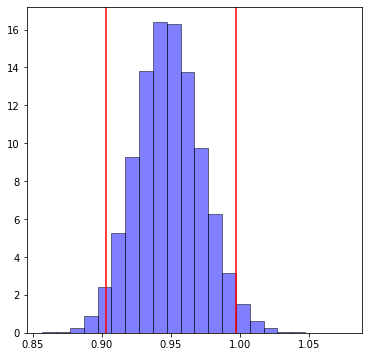

In [27]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
ax1.bar(bines[:-1] + 0.5*w[0],H1Norm,color='b',width=w,ec='k',alpha=0.5, label='Observed')
ax1.axvline( x = cuantiles[0], color='r')
ax1.axvline( x = cuantiles[1], color='r')

In [34]:
alpha = 0.05
T1 = t.ppf( 0.5*alpha, df = n  - 1   )
T2 = t.ppf( 1- 0.5*alpha, df = n  - 1   )
print(T1,T2)

-2.262157162740992 2.2621571627409915


In [36]:
s = np.sqrt(  np.sum( (sample - np.mean(sample))**2 )/(n-1)  )
print(s,np.std(sample))

0.07897714155937077 0.07492429512514616


In [38]:
IC = [ media + T1*s/np.sqrt(n), media + T2*s/np.sqrt(n)  ]
print(IC)

[0.8920031563731101, 1.0049968436268897]
